In [1]:
from sklearn import model_selection
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
import os
import torch
import numpy as np
import pandas as pd
from MicroBiome import MicroBiomeDataSet, Trainer, TrainTester, MultiTrainTester
from SNN import FeedForward, SiameseDataSet, SiameseModel, seed_everything
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random

# Ignore warning messages
if True:
    import warnings
    warnings.filterwarnings('ignore')

# Load Data

In [2]:
from sklearn.datasets import make_moons

np.random.seed(42)

X, y = make_moons(n_samples=4000, noise=.10, random_state=42)
OneHot = OneHotEncoder(sparse=False)
y = OneHot.fit_transform(y.reshape((y.shape[0], 1)))

In [3]:
y

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [4]:
y.shape

(4000, 2)

In [5]:
np.sum(y, axis=0)

array([2000., 2000.])

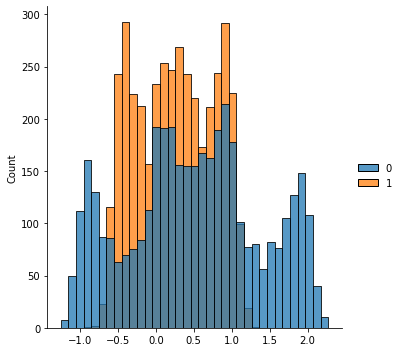

In [6]:
sns.displot(X)

In [7]:
# Test Effect of making X non-negative
# X = X + 2

# Define and Train Model

In [8]:
seed_everything(69)

In [9]:
MyFeedForward = FeedForward(2, [6, 3])

In [10]:
MyFeedForward

FeedForward(
  (layers): ModuleList(
    (0): Linear(in_features=2, out_features=6, bias=True)
    (1): Linear(in_features=6, out_features=3, bias=True)
  )
)

In [11]:
MySNN = SiameseModel(MyFeedForward, predict_unknown = False, class_min_train=5, 
                     n_example_predict=10, learning_rate=1.0e-2, num_epochs = 50, batch_size = 1000, rand_seed=142)

In [12]:
# list(MySNN.logistic.parameters()) + list(MySNN.model.parameters())

In [13]:
MyTrainer = Trainer(model = MySNN, scale_X = False, use_pca = False, n_components = 2)

In [14]:
MyTrainTester = TrainTester(MyTrainer, metrics.accuracy_score)

In [15]:
n_splits = 5
MyMultiTrainTester = MultiTrainTester(MyTrainTester, n_splits=n_splits)

In [16]:
MyMultiTrainTester.train(X, y)

Running for split 1 of 5
Training Encoder
#########################################
Epoch 1 of 50
__Training__
2021-03-09 01:39:51
MEAN LOSS: 0.7559329376220704
__Validation__
2021-03-09 01:39:51
MEAN LOSS: 0.6947267602736836
#########################################
Epoch 2 of 50
__Training__
2021-03-09 01:39:51
MEAN LOSS: 0.6275301116943359
__Validation__
2021-03-09 01:39:52
MEAN LOSS: 0.5434715209191817
#########################################
Epoch 3 of 50
__Training__
2021-03-09 01:39:52
MEAN LOSS: 0.5221214691162109
__Validation__
2021-03-09 01:39:52
MEAN LOSS: 0.4694107495161137
#########################################
Epoch 4 of 50
__Training__
2021-03-09 01:39:52
MEAN LOSS: 0.446507096862793
__Validation__
2021-03-09 01:39:52
MEAN LOSS: 0.395422903725309
#########################################
Epoch 5 of 50
__Training__
2021-03-09 01:39:52
MEAN LOSS: 0.3628067764282227
__Validation__
2021-03-09 01:39:53
MEAN LOSS: 0.31225095623576027
#######################################

MEAN LOSS: 0.013208507776260377
__Validation__
2021-03-09 01:40:10
MEAN LOSS: 0.015573501479614973
#########################################
Epoch 46 of 50
__Training__
2021-03-09 01:40:10
MEAN LOSS: 0.012915994024276733
__Validation__
2021-03-09 01:40:10
MEAN LOSS: 0.015281534967499741
#########################################
Epoch 47 of 50
__Training__
2021-03-09 01:40:10
MEAN LOSS: 0.012649875497817993
__Validation__
2021-03-09 01:40:11
MEAN LOSS: 0.01496835859051489
#########################################
Epoch 48 of 50
__Training__
2021-03-09 01:40:11
MEAN LOSS: 0.012343602705001832
__Validation__
2021-03-09 01:40:11
MEAN LOSS: 0.014607501984930167
#########################################
Epoch 49 of 50
__Training__
2021-03-09 01:40:11
MEAN LOSS: 0.012094288444519043
__Validation__
2021-03-09 01:40:11
MEAN LOSS: 0.014236350943653784
#########################################
Epoch 50 of 50
__Training__
2021-03-09 01:40:11
MEAN LOSS: 0.011825800967216492
__Validation__
2021-03-0

MEAN LOSS: 0.013212262487411499
__Validation__
2021-03-09 01:40:31
MEAN LOSS: 0.01168928888872011
#########################################
Epoch 40 of 50
__Training__
2021-03-09 01:40:31
MEAN LOSS: 0.012865081310272216
__Validation__
2021-03-09 01:40:32
MEAN LOSS: 0.011472646016241945
#########################################
Epoch 41 of 50
__Training__
2021-03-09 01:40:32
MEAN LOSS: 0.012552021265029908
__Validation__
2021-03-09 01:40:32
MEAN LOSS: 0.011241702106383124
#########################################
Epoch 42 of 50
__Training__
2021-03-09 01:40:32
MEAN LOSS: 0.012242220973968506
__Validation__
2021-03-09 01:40:32
MEAN LOSS: 0.011025216695320274
#########################################
Epoch 43 of 50
__Training__
2021-03-09 01:40:32
MEAN LOSS: 0.011955804824829101
__Validation__
2021-03-09 01:40:33
MEAN LOSS: 0.010859417765125511
#########################################
Epoch 44 of 50
__Training__
2021-03-09 01:40:33
MEAN LOSS: 0.011668791556358337
__Validation__
2021-03-0

MEAN LOSS: 0.37111729431152346
__Validation__
2021-03-09 01:40:52
MEAN LOSS: 0.3854849993055946
#########################################
Epoch 34 of 50
__Training__
2021-03-09 01:40:53
MEAN LOSS: 0.3704732009887695
__Validation__
2021-03-09 01:40:53
MEAN LOSS: 0.3858522162793672
#########################################
Epoch 35 of 50
__Training__
2021-03-09 01:40:53
MEAN LOSS: 0.3700271514892578
__Validation__
2021-03-09 01:40:53
MEAN LOSS: 0.3856224279807131
#########################################
Epoch 36 of 50
__Training__
2021-03-09 01:40:53
MEAN LOSS: 0.3696155059814453
__Validation__
2021-03-09 01:40:54
MEAN LOSS: 0.3860976170248861
#########################################
Epoch 37 of 50
__Training__
2021-03-09 01:40:54
MEAN LOSS: 0.3696703964233398
__Validation__
2021-03-09 01:40:54
MEAN LOSS: 0.3862744287581834
#########################################
Epoch 38 of 50
__Training__
2021-03-09 01:40:54
MEAN LOSS: 0.370101953125
__Validation__
2021-03-09 01:40:55
MEAN LOSS: 0.

MEAN LOSS: 0.4005901412963867
__Validation__
2021-03-09 01:41:14
MEAN LOSS: 0.3563765964456553
#########################################
Epoch 28 of 50
__Training__
2021-03-09 01:41:14
MEAN LOSS: 0.39910342864990234
__Validation__
2021-03-09 01:41:14
MEAN LOSS: 0.3550957852285473
#########################################
Epoch 29 of 50
__Training__
2021-03-09 01:41:14
MEAN LOSS: 0.3908267425537109
__Validation__
2021-03-09 01:41:15
MEAN LOSS: 0.34251185090127667
#########################################
Epoch 30 of 50
__Training__
2021-03-09 01:41:15
MEAN LOSS: 0.37374435119628907
__Validation__
2021-03-09 01:41:15
MEAN LOSS: 0.3270041725852273
#########################################
Epoch 31 of 50
__Training__
2021-03-09 01:41:15
MEAN LOSS: 0.3436955093383789
__Validation__
2021-03-09 01:41:16
MEAN LOSS: 0.3113055911609227
#########################################
Epoch 32 of 50
__Training__
2021-03-09 01:41:16
MEAN LOSS: 0.3239912078857422
__Validation__
2021-03-09 01:41:16
MEAN LO

MEAN LOSS: 0.03138842277526856
__Validation__
2021-03-09 01:41:35
MEAN LOSS: 0.03138120683005648
#########################################
Epoch 22 of 50
__Training__
2021-03-09 01:41:35
MEAN LOSS: 0.029609022521972655
__Validation__
2021-03-09 01:41:36
MEAN LOSS: 0.02946427681765827
#########################################
Epoch 23 of 50
__Training__
2021-03-09 01:41:36
MEAN LOSS: 0.02811769485473633
__Validation__
2021-03-09 01:41:36
MEAN LOSS: 0.027990628104291447
#########################################
Epoch 24 of 50
__Training__
2021-03-09 01:41:36
MEAN LOSS: 0.02686723918914795
__Validation__
2021-03-09 01:41:36
MEAN LOSS: 0.026787492415585246
#########################################
Epoch 25 of 50
__Training__
2021-03-09 01:41:37
MEAN LOSS: 0.02573664836883545
__Validation__
2021-03-09 01:41:37
MEAN LOSS: 0.02565923110522417
#########################################
Epoch 26 of 50
__Training__
2021-03-09 01:41:37
MEAN LOSS: 0.024727196407318117
__Validation__
2021-03-09 01:4

In [17]:
scores_df = pd.DataFrame({'score': MyMultiTrainTester.train_scores, 'stage' : np.repeat('train', n_splits)})
scores_df = scores_df.append(pd.DataFrame({'score': MyMultiTrainTester.test_scores, 'stage' : np.repeat('test', n_splits)}))
scores_df

,score,stage
0,0.999375,train
1,0.999687,train
2,0.908438,train
3,0.981875,train
4,1.000000,train
0,0.998750,test
1,0.998750,test
2,0.886250,test
3,0.982500,test
4,0.998750,test


<AxesSubplot:xlabel='stage', ylabel='score'>

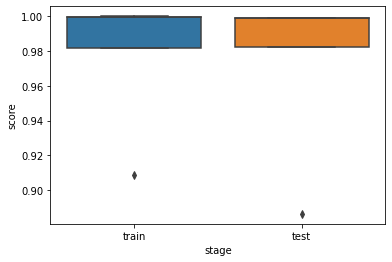

In [18]:
sns.boxplot(data = scores_df, x = 'stage', y = 'score')

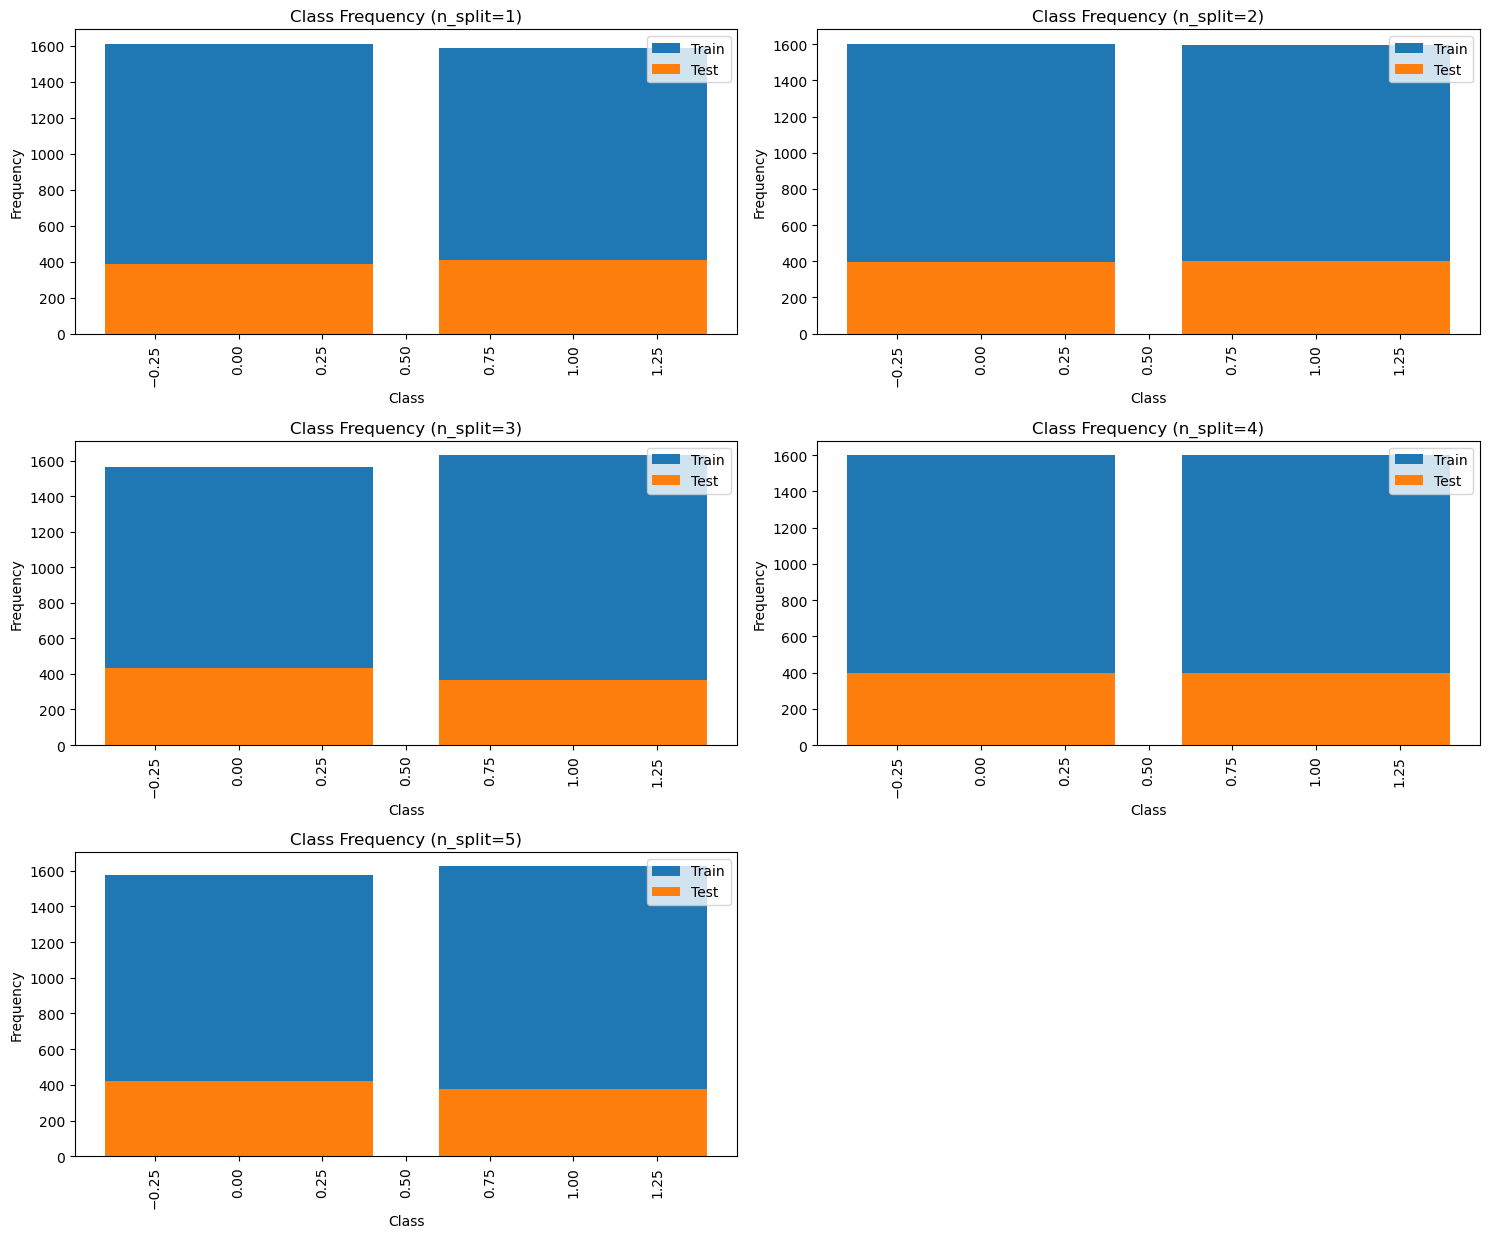

In [19]:
MyMultiTrainTester.plot_class_freq(normalize=True)

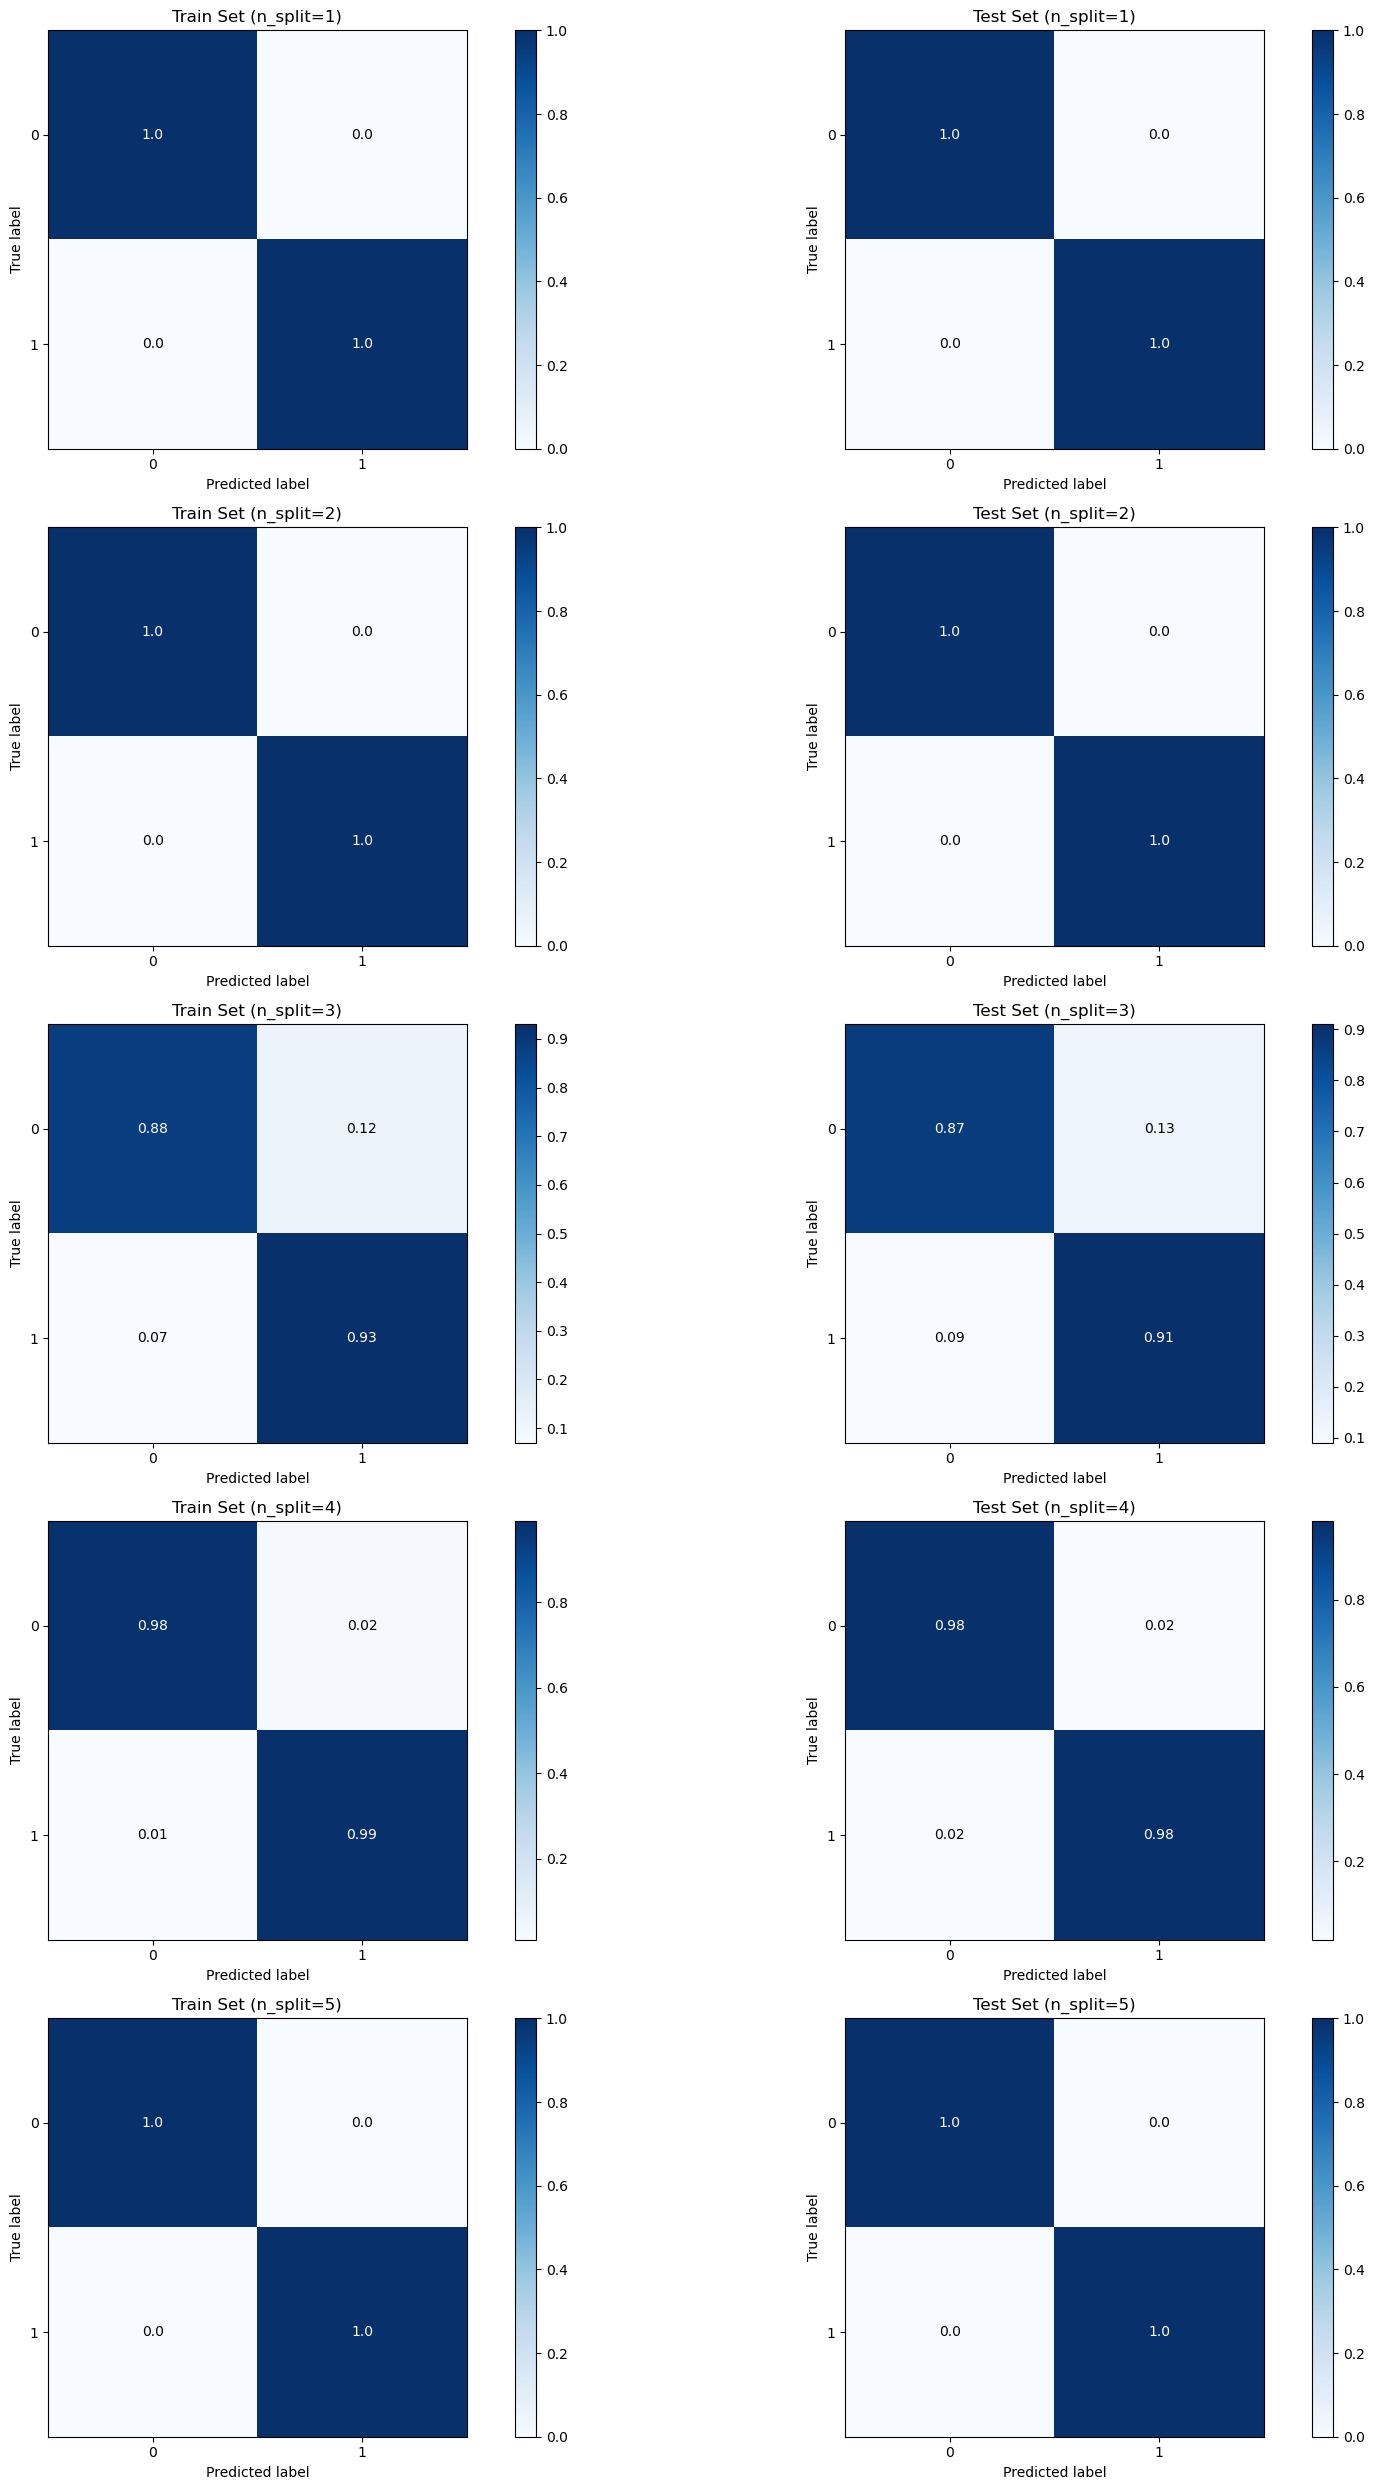

In [20]:
MyMultiTrainTester.plot_confusion(normalize=True)

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


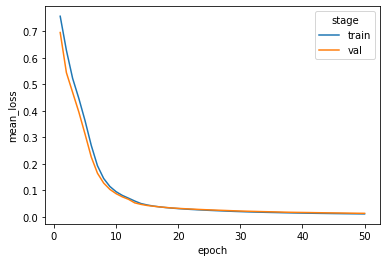

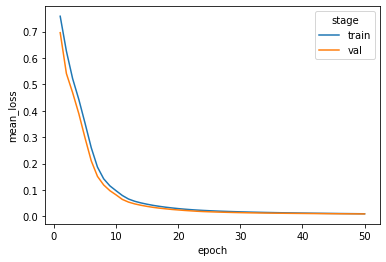

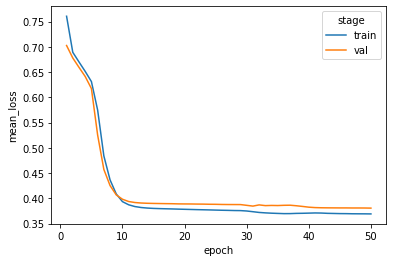

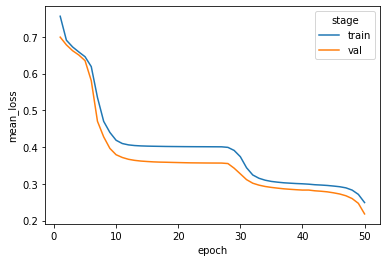

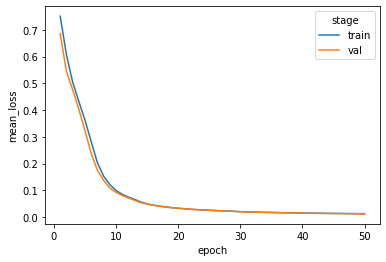

In [21]:
for i, trainer in enumerate(MyMultiTrainTester.TrainerList):
    plt.figure(i)
    print(sns.lineplot(data=trainer.model.TrainStats, x='epoch', y='mean_loss', hue = 'stage'))

### Examine Data In Encoded Space

In [22]:
Trainer_use = MyMultiTrainTester.TrainerList[0]

In [23]:
X_transform = Trainer_use.transform_X(X)

In [24]:
X_encoded = Trainer_use.model.model.forward(torch.from_numpy(X_transform).to(torch.float32)).detach().numpy()

In [25]:
# X_encoded = MyFeedForward.forward(torch.from_numpy(X_transform).to(torch.float32)).detach().numpy()

In [26]:
X_encoded.shape

(4000, 3)

In [27]:
y_label = Trainer_use.model.one_hot.inverse_transform(y).astype('str')

In [28]:
y_pred = Trainer_use.model.predict(X_transform)
y_pred = Trainer_use.model.one_hot.inverse_transform(y_pred).astype('str')

In [29]:
X_enc_df = pd.DataFrame(X_encoded, columns = ['X' + str(i+1) for i in range(X_encoded.shape[1])])
X_enc_df['y'] = y_label
X_enc_df['y_pred'] = y_pred

In [30]:
X_enc_df

,X1,X2,X3,y,y_pred
0,2.203657,0.272267,0.0,0,0
1,0.000000,2.004360,0.0,1,1
2,2.346306,0.411297,0.0,0,0
3,0.000000,1.539186,0.0,1,1
4,0.000000,1.291973,0.0,1,1
...,...,...,...,...,...
3995,2.577839,1.132266,0.0,0,0
3996,2.798577,2.825156,0.0,0,0
3997,2.516944,0.337819,0.0,0,0
3998,0.000000,1.994456,0.0,1,1


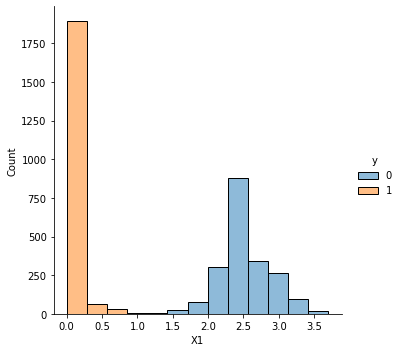

In [31]:
sns.displot(data=X_enc_df, x='X1', hue='y')

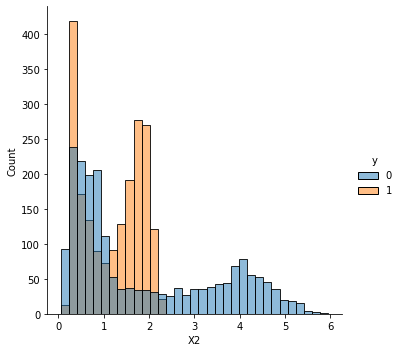

In [32]:
sns.displot(data=X_enc_df, x='X2', hue='y')

In [33]:
def do_plot(df, x, y, hue):
    if x in df.columns and y in df.columns and hue in df.columns:
        sns.scatterplot(data=df, x=x, y=y, hue = hue)

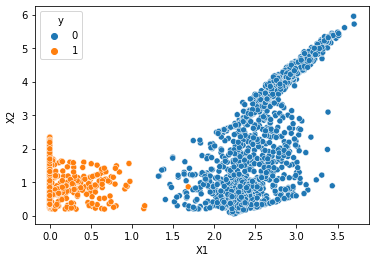

In [34]:
do_plot(X_enc_df, 'X1', 'X2', 'y')

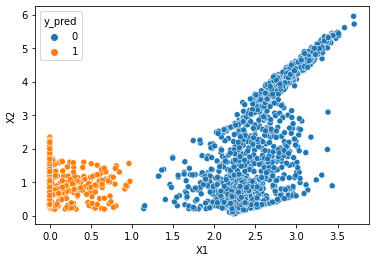

In [35]:
do_plot(X_enc_df, 'X1', 'X2', 'y_pred')

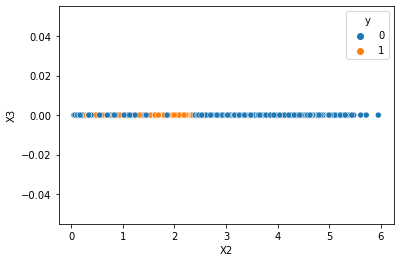

In [36]:
do_plot(X_enc_df, 'X2', 'X3', 'y')

In [37]:
do_plot(X_enc_df, 'X3', 'X4', 'y')

### Visualize Distances Between Database Points and Query Points

Overall, it seems that logistic classifer chokes if there are uninformative features.

In [38]:
X_db = Trainer_use.model.ClassDB['X_encoded'].detach().numpy()

In [39]:
X_db.shape

(20, 3)

In [40]:
y_db = Trainer_use.model.ClassDB['y'].detach().numpy()
y_db = Trainer_use.model.one_hot.inverse_transform(y_db).astype('str').flatten()

In [41]:
db_df = pd.DataFrame(X_db, columns = ['X' + str(i+1) for i in range(X_encoded.shape[1])])
db_df['y'] = y_db

In [42]:
db_df['y'].value_counts()

0    10
1    10
Name: y, dtype: int64

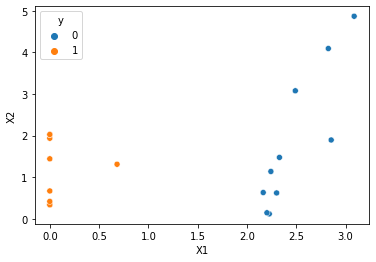

In [43]:
do_plot(db_df, 'X1', 'X2', 'y')

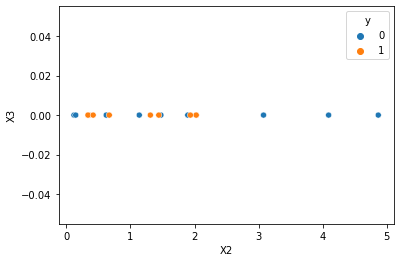

In [44]:
do_plot(db_df, 'X2', 'X3', 'y')

In [45]:
X_enc_df['misclassified'] = X_enc_df['y'] != X_enc_df['y_pred']

In [46]:
X_enc_df

,X1,X2,X3,y,y_pred,misclassified
0,2.203657,0.272267,0.0,0,0,False
1,0.000000,2.004360,0.0,1,1,False
2,2.346306,0.411297,0.0,0,0,False
3,0.000000,1.539186,0.0,1,1,False
4,0.000000,1.291973,0.0,1,1,False
...,...,...,...,...,...,...
3995,2.577839,1.132266,0.0,0,0,False
3996,2.798577,2.825156,0.0,0,0,False
3997,2.516944,0.337819,0.0,0,0,False
3998,0.000000,1.994456,0.0,1,1,False


In [47]:
misclassified_idx = np.argwhere(X_enc_df['misclassified'].to_numpy()).flatten()
misclassified_idx

array([ 254, 1355, 1570])

In [48]:
X_enc_df.iloc[misclassified_idx, :]

,X1,X2,X3,y,y_pred,misclassified
254,1.143505,0.208241,0.0,1,0,True
1355,1.683878,0.858838,0.0,1,0,True
1570,1.154324,0.292923,0.0,1,0,True


In [49]:
X_diff = torch.abs(torch.from_numpy(X_encoded[misclassified_idx[0], :] - X_db).to(torch.float32))
logistic_output = Trainer_use.model.logistic.forward(X_diff)

In [50]:
y_db == '0'

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False])

In [51]:
logistic_output[y_db == '0', 1]

tensor([0.1125, 0.3139, 0.5267, 0.8235, 0.6069, 0.8771, 0.7643, 0.3265, 0.3357,
        0.6056], grad_fn=<IndexBackward>)

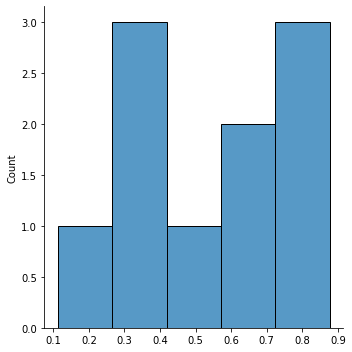

In [52]:
# distribution of 0 label probabilities
sns.displot(logistic_output[y_db == '0', 1].detach().numpy())

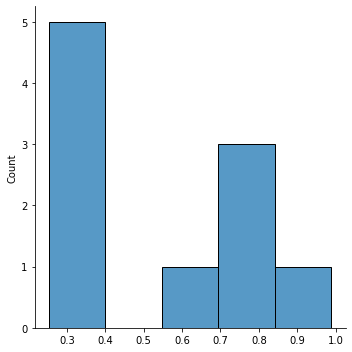

In [53]:
# distribution of 1 label
sns.displot(logistic_output[y_db == '1',1].detach().numpy())

In [54]:
torch.median(logistic_output[y_db == '0',1])

tensor(0.5267, grad_fn=<MedianBackward0>)

In [55]:
torch.median(logistic_output[y_db == '1',1])

tensor(0.3621, grad_fn=<MedianBackward0>)

In [56]:
X_diff_df = pd.DataFrame(X_diff, columns = ['X' + str(i+1) + '_diff' for i in range(X_encoded.shape[1])])
X_diff_df['y'] = y_db

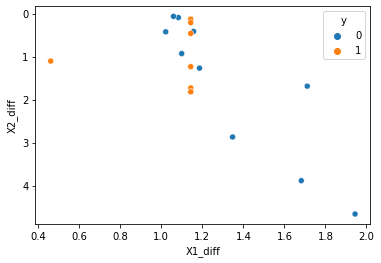

In [57]:
do_plot(X_diff_df, 'X1_diff', 'X2_diff', 'y')

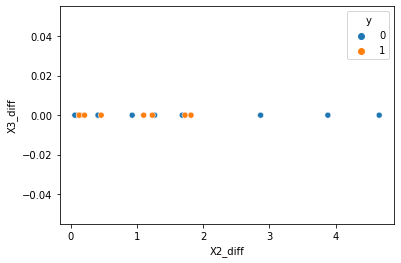

In [58]:
do_plot(X_diff_df, 'X2_diff', 'X3_diff', 'y')

In [59]:
for p in Trainer_use.model.logistic.parameters():
    print(p)

Parameter containing:
tensor([[ 3.1396e+00, -5.9137e-01, -7.8674e-24],
        [-2.8672e+00,  9.6983e-01, -1.9063e-24]], requires_grad=True)
Parameter containing:
tensor([-2.9055,  2.6775], requires_grad=True)


In [60]:
3.6720

3.672

### Examine Data In Original Space

In [61]:
X_df = pd.DataFrame(X, columns = ['X1', 'X2'])
X_df['y'] = y_label

<AxesSubplot:xlabel='X1', ylabel='X2'>

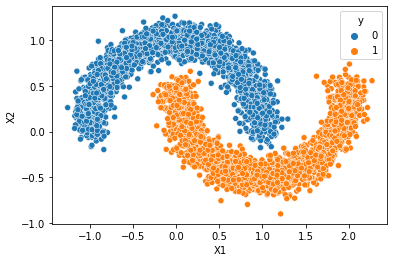

In [62]:
sns.scatterplot(data=X_df, x='X1', y='X2', hue = 'y')